In [1]:
import tensorflow as tf 
from tensorflow import keras 
from keras.layers import Dense, Flatten 
from keras import Sequential 

In [2]:
(x_train,y_train), (x_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

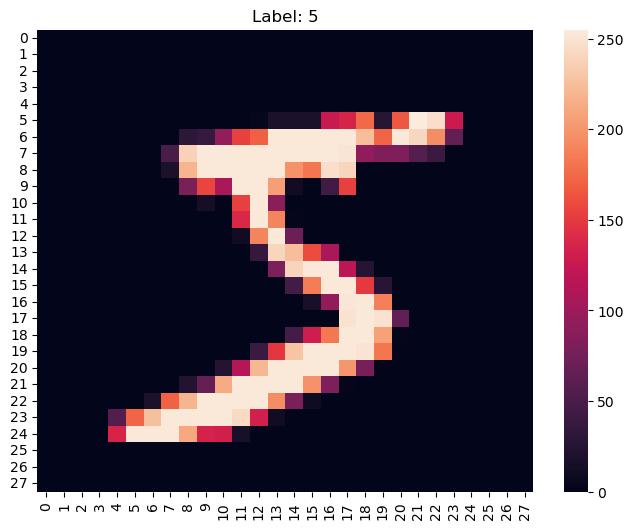

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(x_train[0], annot=False, cmap='rocket', cbar=True)
plt.title(f"Label: {y_train[0]}")
plt.show()

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

E:\prerna\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
history= model.fit(x_train,y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9177 - loss: 0.2865 - val_accuracy: 0.9554 - val_loss: 0.1572
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1249 - val_accuracy: 0.9628 - val_loss: 0.1250
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0865 - val_accuracy: 0.9700 - val_loss: 0.0999
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0638 - val_accuracy: 0.9705 - val_loss: 0.1009
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9737 - val_loss: 0.0862
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0387 - val_accuracy: 0.9759 - val_loss: 0.0842
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9743 - val_loss: 0.0891
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0237 -

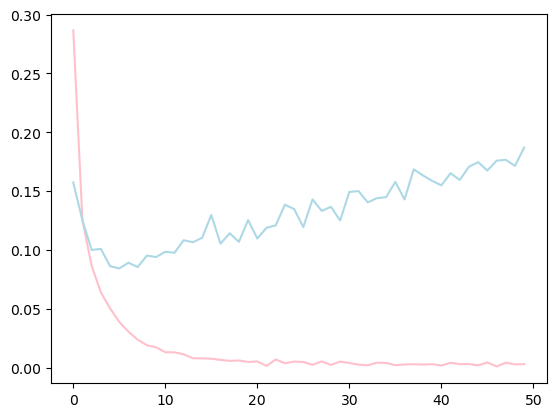

In [12]:
plt.plot(history.history["loss"], c="pink")
plt.plot(history.history["val_loss"], c="lightblue")
plt.show()

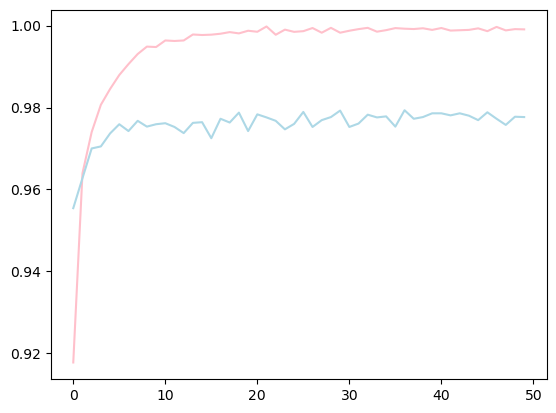

In [14]:
plt.plot(history.history["accuracy"], c="pink")
plt.plot(history.history["val_accuracy"], c="lightblue")
plt.show()

In [15]:
y_prob= model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
y_pred= y_prob.argmax(axis=1)

In [17]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy= accuracy_score(y_test,y_pred)*100
accuracy

97.5

In [19]:
model.predict(x_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([4])

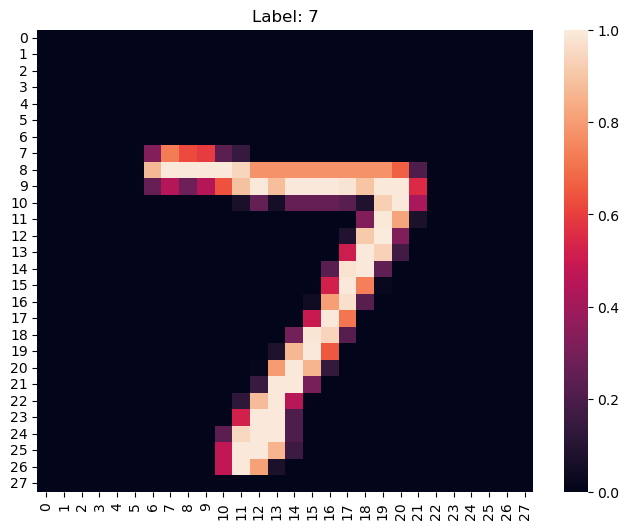

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(x_test[0], annot=False, cmap='rocket', cbar=True)
plt.title(f"Label: {y_test[0]}")
plt.show()